In [11]:
import numpy as np
import sounddevice as sd
import scipy.io as io
import functools


In [2]:
def sine(amplitude, frequency, time, phase):
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)


In [3]:
def play_tone(tone, time_view, amplitude):
    phase = 0
    sampling_rate = 44100
    sampling_period = 1. / sampling_rate  # s
    n_samples = time_view / sampling_period
    time = np.linspace(0, time_view, int(n_samples + 1))

    wave = sine(amplitude, tone, time, phase)
    sd.default.samplerate = sampling_rate

    sd.play(wave, blocking=True)
    sd.wait()

In [9]:
# Source: https://ro.wikipedia.org/wiki/%C3%8En%C4%83l%C8%9Bimea_sunetelor
do_freq = 261
re_freq = 293
mi_freq = 329
fa_freq = 349
sol_freq = 392
la_freq = 440
si_freq = 493
do_2_freq = 523.25
re_2_freq = 587.33
mi_2_freq = 659.25

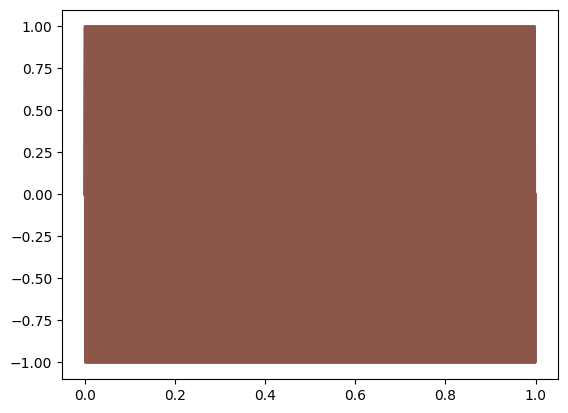

In [5]:
play_tone(do_freq, 1, 1)
play_tone(re_freq, 1, 1)
play_tone(mi_freq, 1, 1)
play_tone(fa_freq, 1, 1)
play_tone(sol_freq, 1, 1)
play_tone(la_freq, 1, 1)


In [6]:
class Note:
    def __init__(self, tone, value):
        self.tone = tone
        self.value = value

In [62]:
notes = [Note(sol_freq, 0.25), Note(la_freq, 0.25), Note(si_freq, 0.25), Note(sol_freq, 0.25), Note(sol_freq, 0.25),
         Note(la_freq, 0.25), Note(si_freq, 0.25), Note(sol_freq, 0.25), Note(si_freq, 0.25), Note(do_2_freq, 0.25),
         Note(re_2_freq, 0.5), Note(si_freq, 0.25), Note(do_2_freq, 0.25),
         Note(re_2_freq, 0.5), Note(re_2_freq, 0.12), Note(mi_2_freq, 0.12), Note(re_2_freq, 0.12),
         Note(do_2_freq, 0.12), Note(si_freq, 0.25), Note(sol_freq, 0.25), Note(re_2_freq, 0.12), Note(mi_2_freq, 0.12),
         Note(re_2_freq, 0.12),
         Note(do_2_freq, 0.12), Note(si_freq, 0.25), Note(sol_freq, 0.25), Note(sol_freq, 0.25), Note(do_freq, 0.25),
         Note(sol_freq, 0.5), Note(sol_freq, 0.25), Note(do_freq, 0.25), Note(sol_freq, 0.5)]

#BPM
tempo = 120

beat_length = 4

In [70]:
from math import floor


def get_signal_from_notes(notes, tempo, beat_length):
    sampling_rate = 44100
    sampling_period = 1. / sampling_rate  # s
    note_duration = beat_length / (tempo / 60)
    time_view = functools.reduce(lambda acc, curr: acc + curr.value, notes, 0) * note_duration  # seconds
    print(time_view)
    n_samples = time_view / sampling_period
    time = np.linspace(0, time_view, int(n_samples + 1))

    samples_passed = 0
    wave_list = []
    for i in range(len(notes)):
        note = notes[i]
        note_sample_count = floor(n_samples * ((note.value * note_duration) / time_view))
        time_for_note = time[samples_passed:samples_passed + note_sample_count]
        samples_passed = samples_passed + note_sample_count
        wave_list.append(sine(1, note.tone, time_for_note, 0))

    return functools.reduce(lambda acc, curr: np.concatenate([acc, curr]), wave_list)


def play_wave(wave):
    sampling_rate = 44100
    sd.default.samplerate = sampling_rate

    sd.play(wave, blocking=True)
    sd.wait()


def write_wave(wave):
    io.wavfile.write("sinus_1.wav", 44100, wave)

In [72]:
play_wave(get_signal_from_notes(notes, tempo, beat_length))

15.920000000000002
